# Text Mining

## BASIC text preprocessing
Lowercasing<br>
Removing punctuation, whitespaces, and numbers<br>
Removing other specific text patterns (for example, emails)<br>
Removing stop words<br>
Stemming or lemmatization<br>

In [3]:
file_path = "C:/Ava/Sheridan/Data Science/module 7-text mining/wnp.txt"

with open(file_path, "r", encoding="utf-8") as file:
    wnp = file.read()


In [4]:
wnp[:100]

'\ufeff\nThe Project Gutenberg EBook of War and Peace, by Leo Tolstoy\n\nThis eBook is for the use of anyone '

In [6]:
wnp = wnp.lower()
wnp[:100]

'\ufeff\nthe project gutenberg ebook of war and peace, by leo tolstoy\n\nthis ebook is for the use of anyone '

In [7]:
import re

wnp = re.sub(r'\s+', ' ', wnp).strip()
wnp[:100]

'\ufeff the project gutenberg ebook of war and peace, by leo tolstoy this ebook is for the use of anyone a'

In [8]:
re.sub('\s+', ' ', wnp)[:100]

'\ufeff the project gutenberg ebook of war and peace, by leo tolstoy this ebook is for the use of anyone a'

In [9]:
re.sub('\\s+', ' ', wnp)[:100]

'\ufeff the project gutenberg ebook of war and peace, by leo tolstoy this ebook is for the use of anyone a'

In [10]:
import string

wnp = wnp.translate(str.maketrans('', '', string.punctuation))
wnp[:100]

'\ufeff the project gutenberg ebook of war and peace by leo tolstoy this ebook is for the use of anyone an'

In [11]:
string.digits + string.punctuation

'0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
wnp = re.sub(r'\w+@\w+\.\w+', '', wnp)
wnp[:100]

'\ufeff the project gutenberg ebook of war and peace by leo tolstoy this ebook is for the use of anyone an'

In [14]:
email_test_string = 'this is an email: hello@test.com; while this is not: hello@test'
re.sub(r'\w+@\w+\.\w+', '', email_test_string)

'this is an email: ; while this is not: hello@test'

In [15]:
# _stop_words in sklearn 0.23 and below, _stop_word in sklearn 0.24 and above
from sklearn.feature_extraction import _stop_words

non_stopwords = []
for word in wnp.split():
    if word not in _stop_words.ENGLISH_STOP_WORDS:
        non_stopwords.append(word)
        
cleaned_text = ' '.join(non_stopwords)
cleaned_text[:100]

'\ufeff project gutenberg ebook war peace leo tolstoy ebook use cost restrictions whatsoever copy away reu'

In [16]:
_stop_words.ENGLISH_STOP_WORDS

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [17]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Kobra
[nltk_data]     Khanmohammadi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
nltk.corpus.stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer('english')
stemmed_words = []
for word in cleaned_text.split():
    stemmed_words.append(stemmer.stem(word))
    
stemmed_text = ' '.join(stemmed_words)

In [21]:
stemmed_text[:100]

'\ufeff project gutenberg ebook war peac leo tolstoy ebook use cost restrict whatsoev copi away reus term '

In [22]:
test_string = """“I knew you would be here,” replied Pierre. “I will come to supper
with you. May I?” he added in a low voice so as not to disturb the
vicomte who was continuing his story.
"""
print(test_string)

“I knew you would be here,” replied Pierre. “I will come to supper
with you. May I?” he added in a low voice so as not to disturb the
vicomte who was continuing his story.



In [23]:
cleaned_string = test_string.lower()
cleaned_string = cleaned_string.translate(str.maketrans('', '', string.punctuation + '“”'))

stemmed_words = []
for word in cleaned_string.split():
    if word not in _stop_words.ENGLISH_STOP_WORDS:
        stemmed_words.append(stemmer.stem(word))
    
stemmed_text = ' '.join(stemmed_words)
print(stemmed_text)

knew repli pierr come supper ad low voic disturb vicomt continu stori


In [29]:
!pip install spacy
!python -m spacy download en_core_web_sm

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     --------------------------------------- 12.8/12.8 MB 10.9 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [30]:
import spacy

spacy_en_model = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
spacy_en_model.max_length = 4000000

def clean_text_spacy(text):
    processed_text = spacy_en_model(text)
    lemmas = [w.lemma_ if w.lemma_ != '-PRON-'
              else w.lower_ for w in processed_text
              if w.is_alpha and not w.is_stop]
    return ' '.join(lemmas).lower()

file_path = "C:/Ava/Sheridan/Data Science/module 7-text mining/wnp.txt"

with open(file_path, "r", encoding="utf-8") as file:
    wnp = file.read()
lemmatized_text = clean_text_spacy(wnp)

In [31]:
lemmatized_text[:100]

'project gutenberg ebook war peace leo tolstoy ebook use cost restriction whatsoever copy away use te'

In [32]:
print(test_string)

“I knew you would be here,” replied Pierre. “I will come to supper
with you. May I?” he added in a low voice so as not to disturb the
vicomte who was continuing his story.



In [33]:
clean_text_spacy(test_string)

'know reply pierre come supper add low voice disturb vicomte continue story'

In [34]:
spacy_en_model = spacy.load('en_core_web_sm')
spacy_en_model.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

## word vectors

In [37]:
!python -m spacy download en_core_web_lg


Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 587.7/587.7 MB 5.5 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [38]:
import spacy

spacy_en_model = spacy.load('en_core_web_lg', disable=['parser', 'ner'])
spacy_en_model.max_length = 4000000

file_path = "C:/Ava/Sheridan/Data Science/module 7-text mining/wnp.txt"
with open(file_path, "r", encoding="utf-8") as file:
    wnp = file.read()
    

processed_text = spacy_en_model(wnp)

In [41]:
processed_text.vector.shape

(300,)

In [42]:
for word in processed_text[:10]:
    print(word.text, word.vector)

﻿ [ 2.6103e-01 -5.3210e-01 -2.3295e-01  2.6252e-01  2.3295e+00 -1.4511e+00
  2.7016e+00  2.0873e+00 -3.1161e+00 -2.9452e+00  5.9297e-01 -9.1013e-01
 -3.0560e+00 -1.3176e+00 -8.5866e-01  9.5893e-01  1.1811e+00 -1.4827e+00
  1.1648e+00 -2.7372e+00  3.5250e-01 -1.7297e-01  1.3703e+00 -5.3241e-01
  3.3654e+00 -1.1556e+00  1.0955e+00  2.6704e+00  1.2937e+00 -2.2198e+00
  4.1489e+00 -9.1499e-01 -6.0474e-01  1.7708e+00  1.1461e+00 -2.1048e+00
  1.5106e+00 -1.5863e-01 -1.4922e+00  2.6657e+00  6.6101e-01  1.8842e+00
  2.3222e+00  1.2502e+00 -1.4074e+00  1.6324e+00  2.3591e+00 -1.0236e+00
 -1.9450e+00 -2.1955e+00  1.1305e+00 -6.0847e-01 -4.0215e-01 -2.9794e+00
  1.9568e-01  1.8848e+00  3.0902e+00  6.6982e-01  5.0639e-01 -2.8117e+00
 -2.5546e+00 -1.5032e+00  2.7808e+00  4.3291e+00  7.9203e-02 -5.3772e-01
 -1.3344e+00 -1.3216e+00  1.0937e+00  1.1305e+00  8.3474e-01  3.0873e-01
  1.4776e+00  1.3348e+00 -4.5383e-01 -1.0309e+00  6.8917e-02  7.5246e-01
  2.3630e+00  2.9401e+00  4.0666e-01  1.7384e+00 

## TFIDF vectors

In [43]:
from sklearn.datasets import fetch_20newsgroups

newsgroups_train = fetch_20newsgroups(remove=('headers', 'footers'))

In [44]:
newsgroups_train.keys()


dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [51]:
newsgroups_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
ng_train_tfidf = tfidf_vectorizer.fit_transform(newsgroups_train['data'])

In [53]:
ng_train_tfidf.shape


(11314, 114751)

In [54]:
len(newsgroups_train['data'])


11314

In [55]:
ng_train_tfidf.max()


1.0

In [57]:
!pip install swifter

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 490.6/490.6 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for swifter: filename=swifter-1.3.5-py3-none-any.whl size=16529 sha256=088882d26340567c4ceddf8c0949a52b18f1b6c1d35e26deb8021f019f84c7c8
  Stored in directory: c:\users\kobra khanmohammadi\appdata\local\pip\cache\wheels\51\14\eb\9ae78316a42ca3d4990446075427aafcf638b1ef5400ae4579
Successfully built swifter


In [58]:
import pandas as pd
import swifter

ng_train_df = pd.DataFrame({'text': newsgroups_train['data'],
                            'label': newsgroups_train['target']})
ng_train_df['text'] = ng_train_df['text'].swifter.apply(clean_text_spacy)

tfidf_vectorizer = TfidfVectorizer(min_df=0.1, max_df=0.9)
ng_train_tfidf = tfidf_vectorizer.fit_transform(ng_train_df['text'])

Pandas Apply:   0%|          | 0/11314 [00:00<?, ?it/s]

In [63]:
sparse_matrix = ng_train_tfidf
# Get the non-zero values and their indices
nonzero_values = sparse_matrix.data
row_indices = sparse_matrix.nonzero()[0]
column_indices = sparse_matrix.nonzero()[1]

# Print the non-zero values
for value, row, col in zip(nonzero_values, row_indices, column_indices):
    print(f"Value: {value}, Row: {row}, Column: {col}")

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




Value: 0.043142638968416434, Row: 11312, Column: 463
Value: 0.03677153965405411, Row: 11312, Column: 8661
Value: 0.10367618460105817, Row: 11312, Column: 6187
Value: 0.06446915653001876, Row: 11312, Column: 8499
Value: 0.07657445631318147, Row: 11312, Column: 3275
Value: 0.050586755649558314, Row: 11312, Column: 4314
Value: 0.20327355379096987, Row: 11313, Column: 7962
Value: 0.20373221913926717, Row: 11313, Column: 5883
Value: 0.26459990093234764, Row: 11313, Column: 1194
Value: 0.2675331747930317, Row: 11313, Column: 7380
Value: 0.20149886072548706, Row: 11313, Column: 5913
Value: 0.24416622466896165, Row: 11313, Column: 4279
Value: 0.25490174038708013, Row: 11313, Column: 5671
Value: 0.1948520525611493, Row: 11313, Column: 4956
Value: 0.19743232442082168, Row: 11313, Column: 622
Value: 0.17624105710524926, Row: 11313, Column: 857
Value: 0.1808302609813351, Row: 11313, Column: 8001
Value: 0.20149886072548706, Row: 11313, Column: 6665
Value: 0.15060278897928164, Row: 11313, Column: 4

## Basic text analysis

In [70]:
!pip install pycaret


Defaulting to user installation because normal site-packages is not writeable


In [73]:
newsgroups_train['data']

['I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.',
 "A fair number of brave souls who upgraded their SI clock oscillator have\nshared their experiences for this poll. Please send a brief message detailing\nyour experiences with the procedure. Top speed attained, CPU rated speed,\nadd on cards and adapters, heat sinks, hour of usage per day, floppy disk\nfunctionality with 800 and 1.4 m floppies are especially requested.\n\nI will be summarizing in the next two days, so please add to the network\nknowledge base if you have done the clock upgrade and haven't an

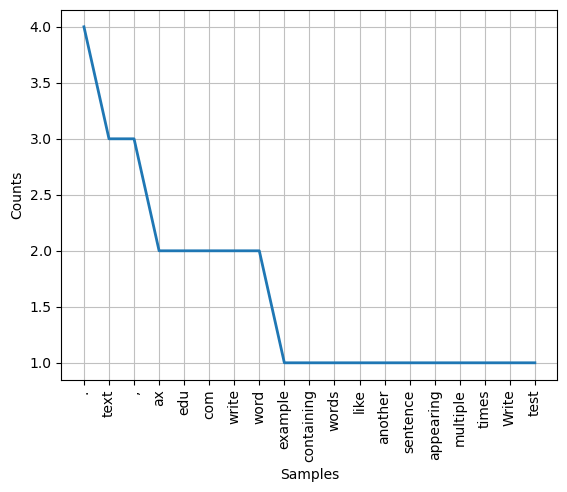

<Axes: xlabel='Samples', ylabel='Counts'>

In [80]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Example data
data = ['This is some example text containing words like ax, edu, com, and write.',
        'Here is another sentence with the word ax.',
        'Some more text with edu and com appearing multiple times.',
        'Write some text to test the word write.']

# Join all texts into a single string
text = ' '.join(data)

# Tokenize the text
tokens = word_tokenize(text)

# Remove stopwords
stopwords = set(stopwords.words('english'))
filtered_tokens = [token for token in tokens if token.lower() not in stopwords]

# Calculate word frequencies
fdist = FreqDist(filtered_tokens)

# Plot word frequency
fdist.plot(30)


In [81]:
lemmatized_text

'project gutenberg ebook war peace leo tolstoy ebook use cost restriction whatsoever copy away use term project gutenberg license include ebook online title war peace author leo tolstoy translator louise aylmer maude posting date january ebook update january language english character set encoding start project gutenberg ebook war peace anonymous volunteer david widger war peace leo tolstoy tolstoi content book chapter chapter ii chapter iii chapter iv chapter v chapter vi chapter vii chapter viii chapter ix chapter x chapter xi chapter xii chapter xiii chapter xiv chapter xv chapter xvi chapter xvii chapter xviii chapter xix chapter xx chapter xxi chapter xxii chapter xxiii chapter xxiv chapter xxv chapter xxvi chapter xxvii chapter xxviii book chapter chapter ii chapter iii chapter iv chapter v chapter vi chapter vii chapter viii chapter ix chapter x chapter xi chapter xii chapter xiii chapter xiv chapter xv chapter xvi chapter xvii chapter xviii chapter xix chapter xx chapter xxi bo

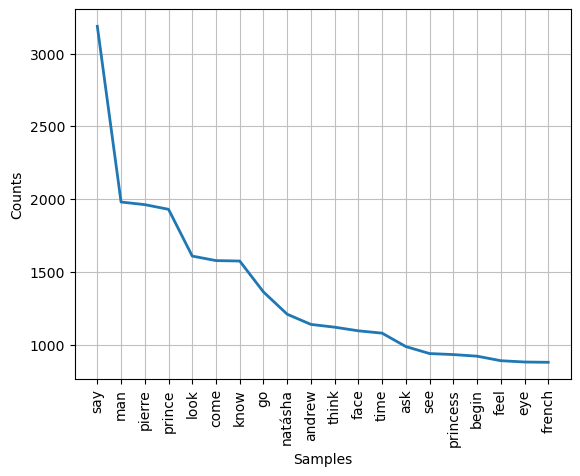

<Axes: xlabel='Samples', ylabel='Counts'>

In [82]:
fd = FreqDist(lemmatized_text.split())
fd.plot(20)

In [83]:
fd.most_common(20)


[('say', 3187),
 ('man', 1981),
 ('pierre', 1963),
 ('prince', 1931),
 ('look', 1610),
 ('come', 1579),
 ('know', 1576),
 ('go', 1364),
 ('natásha', 1211),
 ('andrew', 1141),
 ('think', 1122),
 ('face', 1097),
 ('time', 1081),
 ('ask', 989),
 ('see', 941),
 ('princess', 934),
 ('begin', 923),
 ('feel', 892),
 ('eye', 883),
 ('french', 881)]

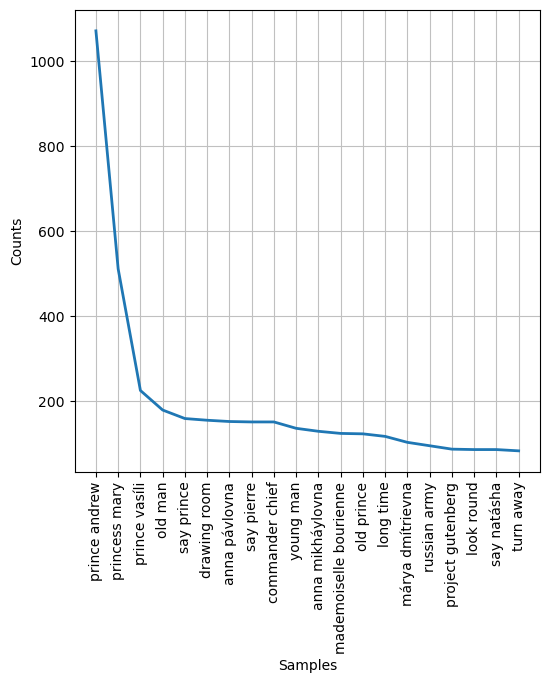

<Axes: xlabel='Samples', ylabel='Counts'>

In [84]:
import matplotlib.pyplot as plt
from nltk import bigrams

f = plt.figure(figsize=(6, 6))
fd_bg = FreqDist(map(' '.join, bigrams(lemmatized_text.split())))
fd_bg.plot(20)

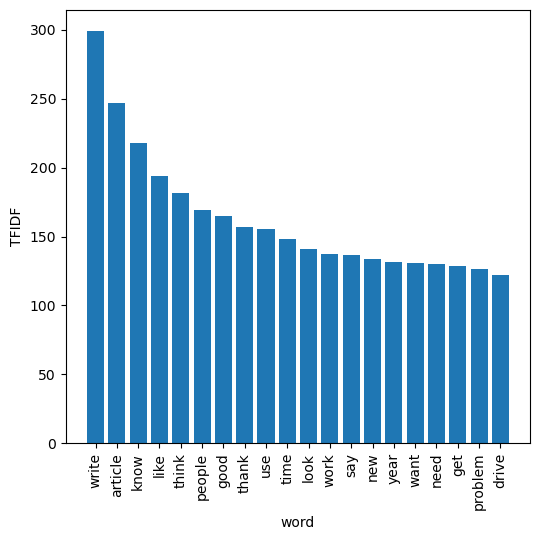

In [85]:
import matplotlib.pyplot as plt
import numpy as np

idx_to_word = {v: k for k, v in tfidf_vectorizer.vocabulary_.items()}

num_words = 20
tfidf_sum = np.asarray(ng_train_tfidf.sum(axis=0)).flatten()
sorted_idx = tfidf_sum.argsort()[::-1]
tfidf_sum = tfidf_sum[sorted_idx]

f = plt.figure(figsize=(5.5, 5.5))
xticks = range(num_words)
plt.bar(xticks, tfidf_sum[:num_words])
plt.xticks(xticks,
           [idx_to_word[i] for i in sorted_idx[:num_words]],
           rotation=90)
plt.xlabel('word')
plt.ylabel('TFIDF')
plt.tight_layout()

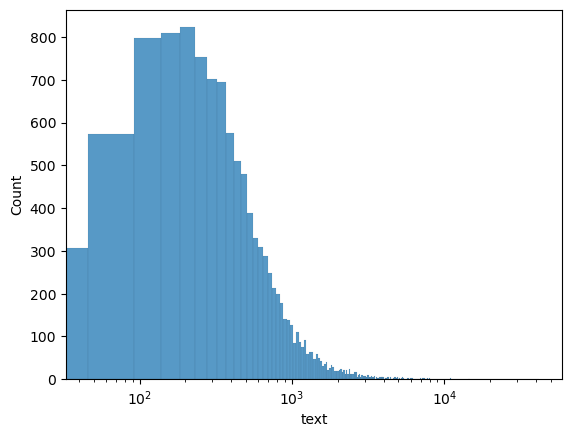

In [86]:
import seaborn as sns

sns.histplot(ng_train_df['text'].apply(lambda x: len(x)))
plt.xscale('log')

In [87]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_grams(docs, n=2):
    v = CountVectorizer(ngram_range=(n, n))
    grams = v.fit_transform(docs)
    gram_sum = np.array(np.sum(grams, axis=0)).flatten()
    gram_dict = {i: v for v, i in v.vocabulary_.items()}
    top_grams = gram_sum.argsort()[::-1]
    
    return [gram_dict[i] for i in top_grams], gram_sum[top_grams]

In [131]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_grams(docs, n=2, top=20, verbose=False):
    v = CountVectorizer(ngram_range=(n, n))
    grams = v.fit_transform(docs)
    gram_sum = np.array(np.sum(grams, axis=0)).flatten()
    gram_dict = {i: v for v, i in v.vocabulary_.items()}
    top_grams = gram_sum.argsort()[::-1]
    if verbose:
        print(f'top {top} {n}-grams:\n')
        for i in top_grams[:top]:
            print('"' + gram_dict[i] + '" shows up', gram_sum[i], 'times')
        print('\n')
    
    return [gram_dict[i] for i in top_grams], gram_sum[top_grams]

In [132]:
ngrams, ngram_counts = {}, {}
for n in [1, 2, 3]:
    ngrams[n], ngram_counts[n] = get_top_grams([lemmatized_text], n=n)

In [133]:
ngram_counts

{1: array([3187, 1981, 1963, ...,    1,    1,    1], dtype=int64),
 2: array([1071,  511,  225, ...,    1,    1,    1], dtype=int64),
 3: array([105,  64,  57, ...,   1,   1,   1], dtype=int64)}

In [90]:
from scipy.stats import zipf

def make_zipf_plot(counts, tokens, a=1.15):
    # inspired from here: https://finnaarupnielsen.wordpress.com/2013/10/22/zipf-plot-for-word-counts-in-brown-corpus/
    ranks = np.arange(1, len(counts) + 1)
    indices = np.argsort(-counts)
    normalized_frequencies = counts[indices] / sum(counts)

    f = plt.figure(figsize=(5.5, 5.5))
    plt.loglog(ranks, normalized_frequencies, marker=".")
    
    plt.loglog(ranks, [z for z in zipf.pmf(ranks, a)])
    
    plt.title("Zipf Plot")
    plt.xlabel("Word frequency rank")
    plt.ylabel("Word frequency")
    
    ax = plt.gca()
    ax.set_aspect('equal')  # make the plot square
    plt.grid(True)
    
    # add text labels
    last_freq = None
    labeled_word_idxs = list(np.logspace(-0.5,
                                         np.log10(len(counts) - 1),
                                         10).astype(int))
    for i in labeled_word_idxs:
        dummy = plt.text(ranks[i],
                         normalized_frequencies[i],
                         " " + tokens[indices[i]], 
                         verticalalignment="bottom",
                         horizontalalignment="left")
    
    plt.tight_layout()
    
    plt.show()

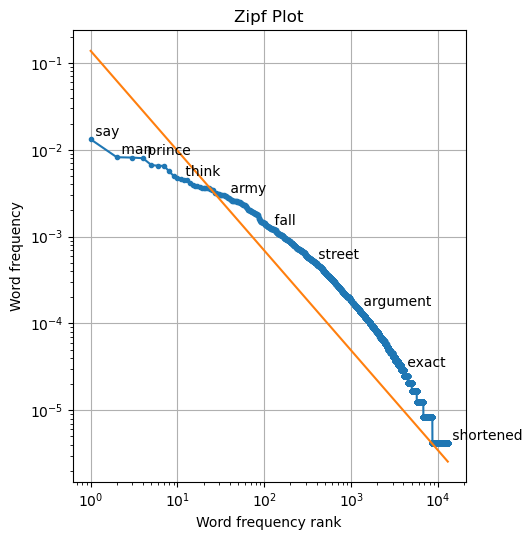

In [91]:
make_zipf_plot(ngram_counts[1], ngrams[1])


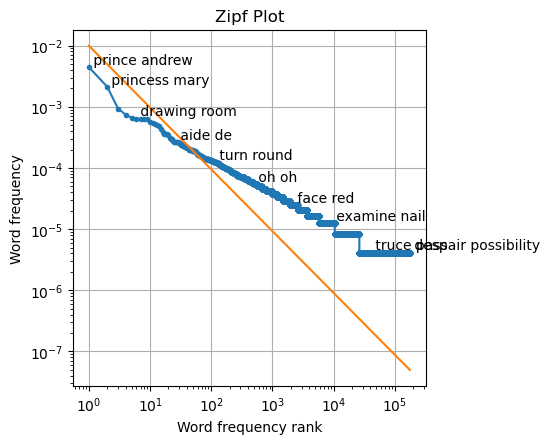

In [92]:
make_zipf_plot(ngram_counts[2], ngrams[2], a=1.01)


## Word collocations

In [93]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

BigramCollocationFinder.from_words(lemmatized_text.split()).\
    nbest(BigramAssocMeasures().pmi, 10)

[('ab', 'ovo'),
 ('academy', 'jotting'),
 ('achtung', 'nehman'),
 ('agwee', 'evewythe'),
 ('ahahah', 'rrrr'),
 ('alliée', 'sincère'),
 ('alliés', 'détruite'),
 ('alphonse', 'kárlovich'),
 ('amber', 'mouthpiece'),
 ('amstetten', 'melk')]

In [94]:
BigramCollocationFinder.from_words(lemmatized_text.split()).\
    score_ngrams(BigramAssocMeasures().pmi)

[(('ab', 'ovo'), 17.881884680590204),
 (('academy', 'jotting'), 17.881884680590204),
 (('achtung', 'nehman'), 17.881884680590204),
 (('agwee', 'evewythe'), 17.881884680590204),
 (('ahahah', 'rrrr'), 17.881884680590204),
 (('alliée', 'sincère'), 17.881884680590204),
 (('alliés', 'détruite'), 17.881884680590204),
 (('alphonse', 'kárlovich'), 17.881884680590204),
 (('amber', 'mouthpiece'), 17.881884680590204),
 (('amstetten', 'melk'), 17.881884680590204),
 (('armfeldts', 'bennigsens'), 17.881884680590204),
 (('arming', 'concentrating'), 17.881884680590204),
 (('arnaut', 'arnauts'), 17.881884680590204),
 (('att', 'ention'), 17.881884680590204),
 (('aubert', 'chalmé'), 17.881884680590204),
 (('aussi', 'spirituelle'), 17.881884680590204),
 (('avenged', 'rancor'), 17.881884680590204),
 (('awistocwacy', 'pwovince'), 17.881884680590204),
 (('awl', 'soap'), 17.881884680590204),
 (('axes', 'chopper'), 17.881884680590204),
 (('axle', 'cog'), 17.881884680590204),
 (('aylmer', 'maude'), 17.881884680

## POS tags

In [ ]:
import spacy

spacy_en_model = spacy.load('en_core_web_lg', disable=['parser', 'ner'])
spacy_en_model.max_length = 4000000

file_path = "C:/Ava/Sheridan/Data Science/module 7-text mining/wnp.txt"
with open(file_path, "r", encoding="utf-8") as file:
    wnp = file.read()
    

processed_text = spacy_en_model(wnp)

In [134]:
processed_text

﻿
The Project Gutenberg EBook of War and Peace, by Leo Tolstoy

This eBook is for the use of anyone anywhere at no cost and with almost
no restrictions whatsoever. You may copy it, give it away or re-use
it under the terms of the Project Gutenberg License included with this
eBook or online at www.gutenberg.org


Title: War and Peace

Author: Leo Tolstoy

Translators: Louise and Aylmer Maude

Posting Date: January 10, 2009 [EBook #2600]

Last Updated: January 21, 2019

Language: English

Character set encoding: UTF-8

*** START OF THIS PROJECT GUTENBERG EBOOK WAR AND PEACE ***




An Anonymous Volunteer, and David Widger






WAR AND PEACE


By Leo Tolstoy/Tolstoi





    CONTENTS


    BOOK ONE: 1805

    CHAPTER I

    CHAPTER II

    CHAPTER III

    CHAPTER IV

    CHAPTER V

    CHAPTER VI

    CHAPTER VII

    CHAPTER VIII

    CHAPTER IX

    CHAPTER X

    CHAPTER XI

    CHAPTER XII

    CHAPTER XIII

    CHAPTER XIV

    CHAPTER XV

    CHAPTER XVI

    CHAPTER XVII

    CHA

In [135]:
pos_dict = {}
pos_dict['word'] = []
pos_dict['POS'] = []
for word in processed_text:
    if word.is_alpha and not word.is_stop:
        pos_dict['word'].append(word.lower_)
        pos_dict['POS'].append(word.pos_)
        
wnp_pos_df = pd.DataFrame(pos_dict)

In [136]:
pos_counts = wnp_pos_df.groupby('POS').count().\
                sort_values(by='word', ascending=False).head(10)
pos_counts.columns = ['count']

In [137]:
pos_counts

count
POS         
NOUN   93395
VERB   72684
PROPN  30915
ADJ    29487
ADV    10847
INTJ    1296
ADP     1184
AUX      495
NUM      376
X        302

In [98]:
wnp_pos_df['count'] = 1

In [99]:
wnp_pos_df.groupby(['POS', 'word']).count().\
    sort_values(by='count', ascending=False).head(10)

count
POS   word          
VERB  said      2839
PROPN pierre    1963
      prince    1585
      natásha   1211
NOUN  man       1182
PROPN andrew    1141
NOUN  time       928
      face       880
VERB  went       862
      know       846

In [100]:
from spacy.glossary import GLOSSARY
GLOSSARY

{'ADJ': 'adjective',
 'ADP': 'adposition',
 'ADV': 'adverb',
 'AUX': 'auxiliary',
 'CONJ': 'conjunction',
 'CCONJ': 'coordinating conjunction',
 'DET': 'determiner',
 'INTJ': 'interjection',
 'NOUN': 'noun',
 'NUM': 'numeral',
 'PART': 'particle',
 'PRON': 'pronoun',
 'PROPN': 'proper noun',
 'PUNCT': 'punctuation',
 'SCONJ': 'subordinating conjunction',
 'SYM': 'symbol',
 'VERB': 'verb',
 'X': 'other',
 'EOL': 'end of line',
 'SPACE': 'space',
 '.': 'punctuation mark, sentence closer',
 ',': 'punctuation mark, comma',
 '-LRB-': 'left round bracket',
 '-RRB-': 'right round bracket',
 '``': 'opening quotation mark',
 '""': 'closing quotation mark',
 "''": 'closing quotation mark',
 ':': 'punctuation mark, colon or ellipsis',
 '$': 'symbol, currency',
 '#': 'symbol, number sign',
 'AFX': 'affix',
 'CC': 'conjunction, coordinating',
 'CD': 'cardinal number',
 'DT': 'determiner',
 'EX': 'existential there',
 'FW': 'foreign word',
 'HYPH': 'punctuation mark, hyphen',
 'IN': 'conjunction, su

# Supervised learning

This is an example of using word vectors as features.

In [ ]:
from sklearn.datasets import fetch_20newsgroups

newsgroups_train = fetch_20newsgroups(remove=('headers', 'footers'))

To sample down for testing, use `.sample(100).reset_index(drop=True)` when creating the train and test dfs.

In [104]:
newsgroups_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [138]:
newsgroups_train = fetch_20newsgroups(remove=('headers', 'footers'))
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers'))

en_large = spacy.load('en_core_web_lg', disable=['parser', 'ner'])

def get_document_vectors(text):
    processed = en_large(text)
    return processed.vector

ng_train_df = pd.DataFrame({'text': newsgroups_train['data'],'label': newsgroups_train['target']})
ng_train_doc_vectors = pd.DataFrame(np.vstack(ng_train_df['text'].swifter.apply(get_document_vectors).tolist()))
ng_test_df = pd.DataFrame({'text': newsgroups_test['data'],'label': newsgroups_test['target']})
ng_test_doc_vectors = pd.DataFrame(np.vstack(ng_test_df['text'].swifter.apply(get_document_vectors).tolist()))

Pandas Apply:   0%|          | 0/11314 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/7532 [00:00<?, ?it/s]

In [139]:
ng_train_vector_df = pd.concat([ng_train_df['label'].astype('category'),ng_train_doc_vectors], axis=1)
ng_test_vector_df = pd.concat([ng_test_df['label'].astype('category'),ng_test_doc_vectors], axis=1)

In [107]:
ng_train_vector_df['label'].value_counts(normalize=True)

10    0.053032
15    0.052943
8     0.052855
9     0.052766
11    0.052590
7     0.052501
13    0.052501
5     0.052413
14    0.052413
12    0.052236
2     0.052236
3     0.052148
6     0.051706
1     0.051617
4     0.051087
17    0.049850
16    0.048259
0     0.042425
18    0.041100
19    0.033322
Name: label, dtype: float64

In [109]:
ng_train_vector_df

label         0         1         2         3         4         5  \
0         7 -1.340724  0.413222 -1.897700 -0.366505  3.285350  0.068491   
1         4 -1.657737  0.339163 -1.788685  0.451495  3.289958  0.124864   
2         4 -1.452039  1.215034 -1.702928 -0.155715  2.212338  0.133450   
3         1 -0.798454  0.452342 -0.179818  0.049241  1.254105 -0.008098   
4        14 -1.388392  0.530730  0.498385  0.280275  1.941244 -0.216065   
...     ...       ...       ...       ...       ...       ...       ...   
11309    13 -1.269777  1.169960 -1.440622 -0.037335  1.978487 -0.162219   
11310     4 -1.981699  0.845863 -1.408020 -0.033765  2.378037  0.023381   
11311     3 -2.037665  1.379465 -2.499440  1.409648  3.824049  0.284798   
11312     1 -1.430781  0.334654 -1.176702  0.322645  1.579921  0.079035   
11313     8 -0.149257 -0.538099 -2.091163 -0.359816  2.359720  0.209166   

              6         7         8  ...       290       291       292  \
0      0.330166  3.893057 -0.262514  ...  0.843259 -0.869505  0.642088   
1      0.290294  4.189160 -0.915794  ... -0.040598  0.163759  0.004881   
2      0.535326  3.442729 -0.945848  ...  0.874338 -0.238182  1.052468   
3      1.235192  2.310595 -2.180076  ...  0.083445  0.370526  1.433618   
4      0.768498  1.751476 -2.245783  ...  0.983541 -0.262644  1.792727   
...         ...       ...       ...  ...       ...       ...       ...   
11309  0.558337  3.118161 -1.578604  ...  0.683077 -0.515628  1.283760   
11310  0.810426  3.133516 -0.380240  ... -0.074051 -0.171533  0.573690   
11311  0.731192  5.121186 -0.266426  ...  0.080780  0.266125  0.276146   
11312  0.675274  2.850915 -1.710705  ...  0.467643 -0.291252  0.978038   
11313  0.071684  2.285933 -0.861064  ... -0.668012  0.280533  0.805676   

            293       294       295       296       297       298       299  
0     -0.273688 -1.614528  1.203523  0.749258 -0.301389 -2.133713  0.560665  
1     -0.536190 -0.764916  1.242778 -0.094817 -1.559485 -2.502080  0.517846  
2     -0.635346 -1.155904  1.045283  0.682535 -0.306610 -2.719835  1.063187  
3     -1.371581 -0.775939  1.111410  0.082144  0.257462 -1.126926 -0.007534  
4     -1.100523 -0.938368  0.991632  0.761232 -0.385891 -2.371778  1.510942  
...         ...       ...       ...       ...       ...       ...       ...  
11309 -0.975519 -0.762036  0.907062  0.671115 -0.313831 -2.702830  1.326633  
11310 -0.482689 -0.690031  1.507501  0.255496 -1.007312 -1.793553  0.445232  
11311  0.226178 -1.622826  1.959055  1.088398 -1.065001 -2.737705  0.755951  
11312 -0.956959 -0.436411  0.921619  1.130379 -0.080595 -1.715923  0.759140  
11313 -1.301251 -0.913459 -0.212522 -0.212725 -0.150131 -1.816300  0.003827  

[11314 rows x 301 columns]

pycaret can be used but is slow with larger feature sets.

In [110]:
ng_train_vector_df.columns

Index(['label',       0,       1,       2,       3,       4,       5,       6,
             7,       8,
       ...
           290,     291,     292,     293,     294,     295,     296,     297,
           298,     299],
      dtype='object', length=301)

In [113]:
#SVM supervised learning
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

X = ng_train_vector_df.iloc[:, 1:]

y = ng_train_vector_df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier object
svm_classifier = SVC()

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.5753424657534246


### Using TFIDF vectors as features
### supervised learning using svm

In [114]:
vectorizer = TfidfVectorizer(min_df=0.1, max_df=0.9)
train_tfidf = vectorizer.fit_transform(newsgroups_train['data'])
test_tfidf = vectorizer.transform(newsgroups_test['data'])

In [115]:
type(newsgroups_train['target'])

numpy.ndarray

In [116]:
train_tfidf_df = pd.DataFrame(train_tfidf.todense())
test_tfidf_df = pd.DataFrame(test_tfidf.todense())
train_tfidf_df['label'] = pd.Series(newsgroups_train['target']).\
    astype('category')
test_tfidf_df['label'] = pd.Series(newsgroups_test['target']).\
    astype('category')

In [117]:
train_tfidf_df.shape

(11314, 13270)

In [118]:
test_tfidf_df.shape

(7532, 13270)

In [128]:
train_tfidf_df.columns

Index([      0,       1,       2,       3,       4,       5,       6,       7,
             8,       9,
       ...
         13260,   13261,   13262,   13263,   13264,   13265,   13266,   13267,
         13268, 'label'],
      dtype='object', length=13270)

In [129]:
#SVM supervised learning
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

X_train = train_tfidf_df.iloc[:, :-1]

y_train = train_tfidf_df['label']

X_test = test_tfidf_df.iloc[:, :-1]

y_test = test_tfidf_df['label']


# Create an SVM classifier object
svm_classifier = SVC()

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.7661975570897503


### supervised learning using logistic regression

In [120]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(ng_train_vector_df.drop('label', axis=1), ng_train_vector_df['label'])
lr.score(ng_train_vector_df.drop('label', axis=1),
         ng_train_vector_df['label'])

0.7502209651758883

In [121]:
lr.score(ng_test_vector_df.drop('label', axis=1), ng_test_vector_df['label'])

0.6415294742432289

In [122]:
lr = LogisticRegression()
lr.fit(train_tfidf_df.drop('label', axis=1), train_tfidf_df['label'])
lr.score(train_tfidf_df.drop('label', axis=1), train_tfidf_df['label'])

0.9432561428318897

In [123]:
lr.score(test_tfidf_df.drop('label', axis=1), test_tfidf_df['label'])

0.7683218268720128

# SPAM Detection

In [173]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm

spam_df = pd.read_csv('C:/Ava/Sheridan/Data Science/module 7-text mining/spam.csv')

In [174]:
spam_df.head()

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [175]:
spam_df = spam_df.loc[:, ~spam_df.columns.str.contains('Unnamed')]


In [176]:
spam_df.head()

v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

In [177]:
spam_df.columns=['Label','EmailText']

In [178]:
spam_df.head()

Label                                          EmailText
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...